In [2]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
from matplotlib_venn import *

plots_dir = 'S:\\lab_winter\\martin\\MED14_PRO-seq_final\\plots\\' # directory for output plots

In [3]:
ibaq_path = 'W:\lab_winter\private\Experiments\Martin_MJ_private\\2018\MJ-18-25_AH_MED14_MED1_chromatome\MJ-18-25_MED14_chromatome_iBAQintensity.txt'
lfq_path = 'W:\lab_winter\private\Experiments\Martin_MJ_private\\2018\MJ-18-25_AH_MED14_MED1_chromatome\MJ-18-25_MED14_chromatome_LFQintensity.txt'
msqrob_path = 'W:\lab_winter\private\Experiments\Martin_MJ_private\\2018\MJ-18-25_AH_MED14_MED1_chromatome\MsqRob_Results.xlsx'

hitlist_path = 'W:\lab_winter\private\Experiments\Martin_MJ_private\\2018\MJ-18-25_AH_MED14_MED1_chromatome\chromatome_hit_lists.xlsx'

In [4]:
hitlist_df = pd.read_excel(hitlist_path)

ibaq_df = pd.read_csv(ibaq_path, sep='\t')
lfq_df = pd.read_csv(lfq_path, sep='\t')
msqrob_df = pd.read_excel(msqrob_path)
# take only Gene name, log2FC, -log10p, significant columns
ibaq_df = ibaq_df.iloc[:,[6,2,1,0]]
lfq_df = lfq_df.iloc[:,[6,2,1,0]]
msqrob_df = msqrob_df.iloc[:,[1,3,7,9]]
msqrob_df['pval'] = msqrob_df['pval'].apply(lambda x: -1.0*np.log10(x))
msqrob_df = msqrob_df.dropna()

# rename columns
ibaq_df.columns = ['gene','log2FC','-log10p','significant?']
lfq_df.columns = ['gene','log2FC','-log10p','significant?']
msqrob_df.columns = ['gene','log2FC','-log10p','significant?']


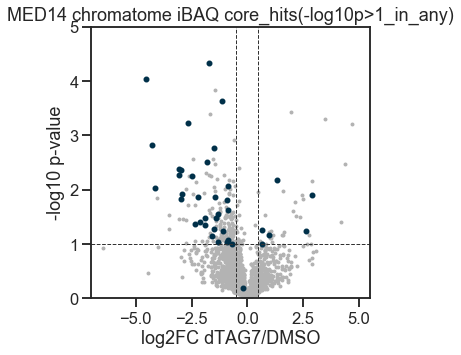

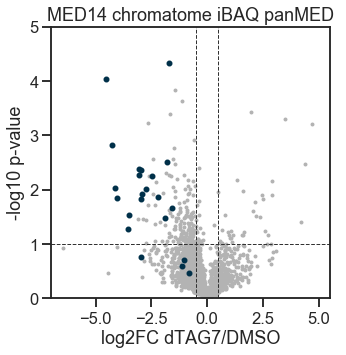

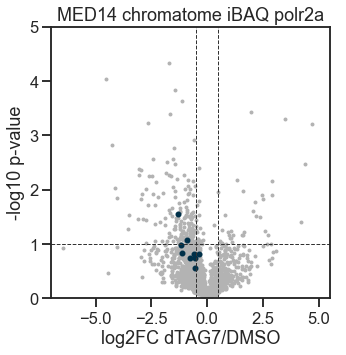

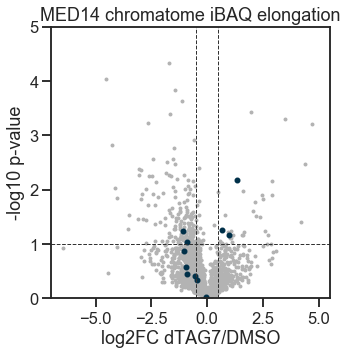

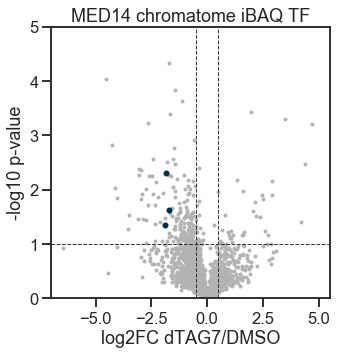

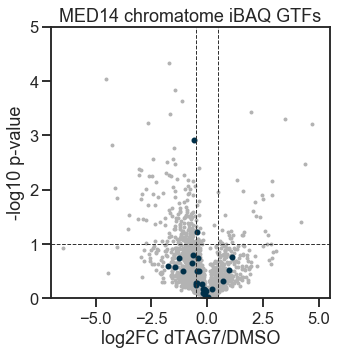

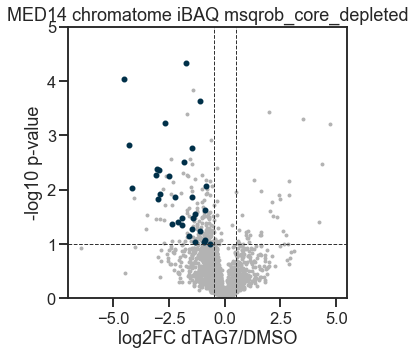

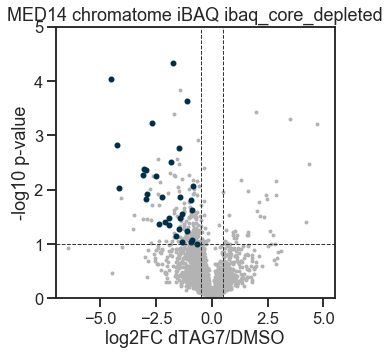

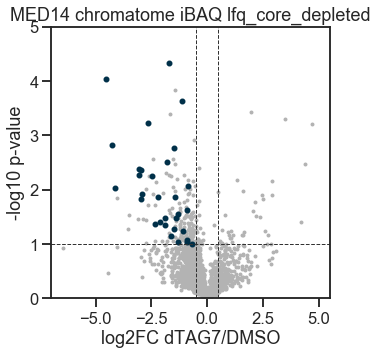

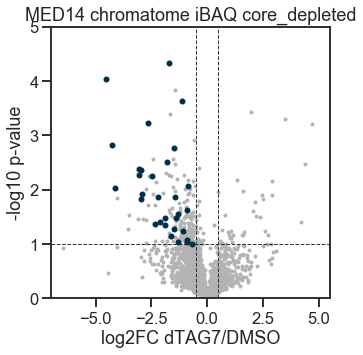

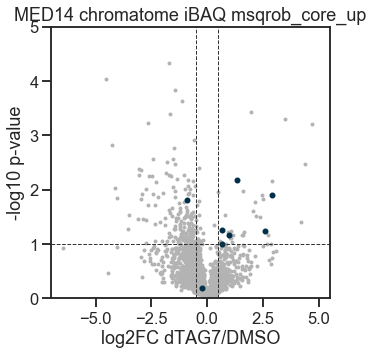

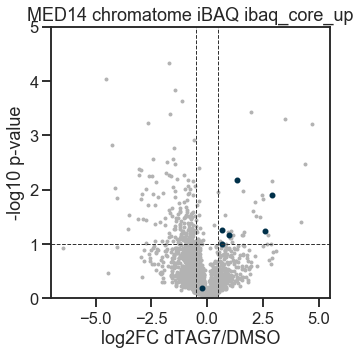

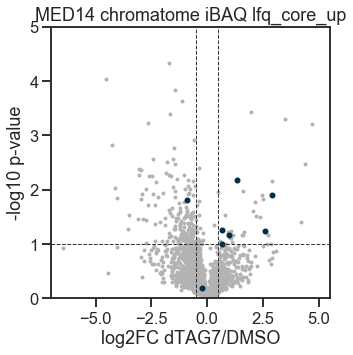

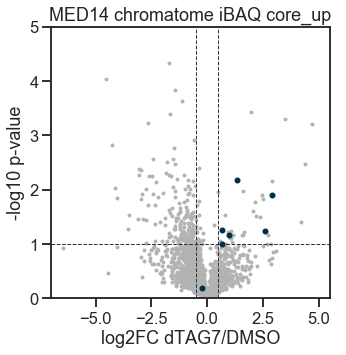

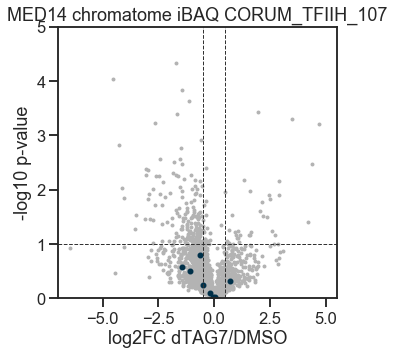

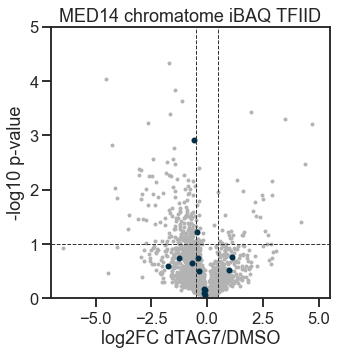

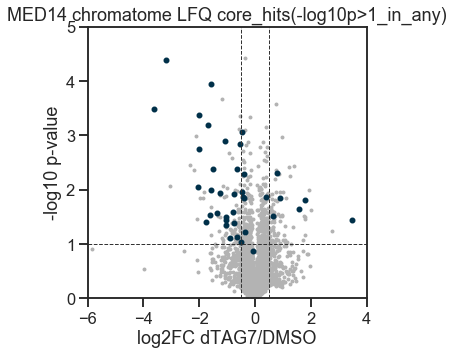

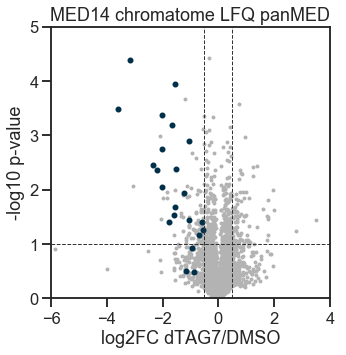

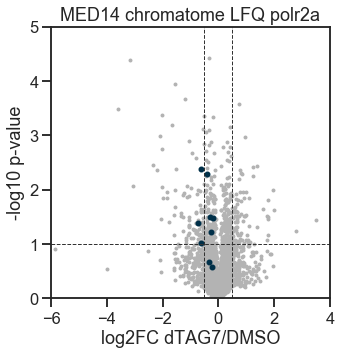

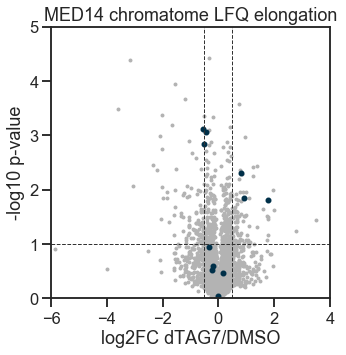

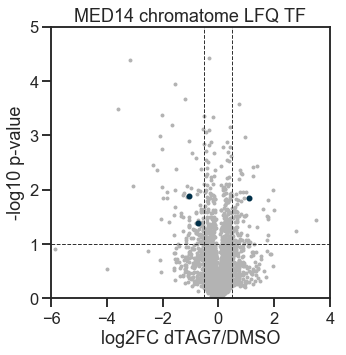

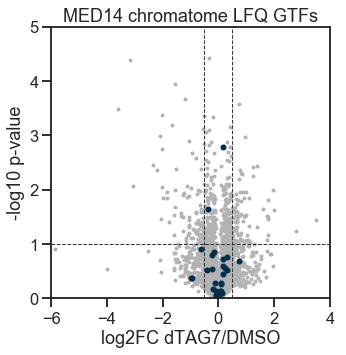

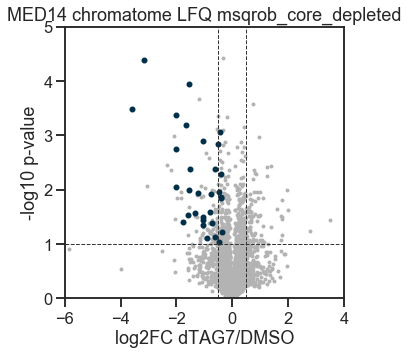

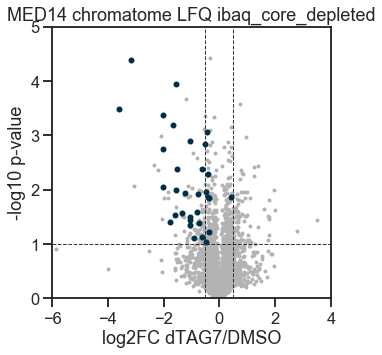

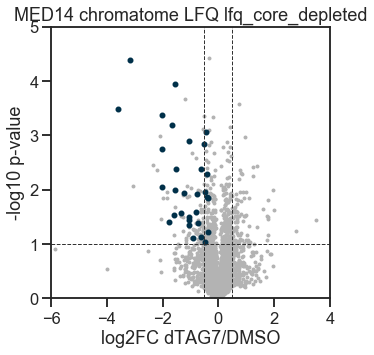

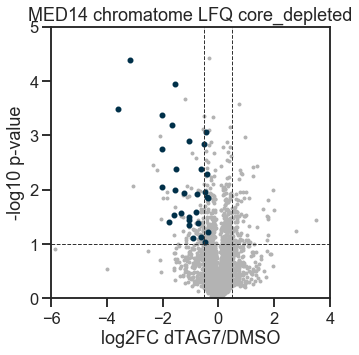

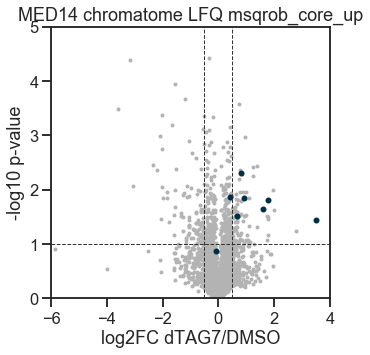

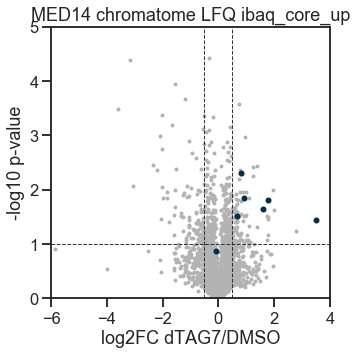

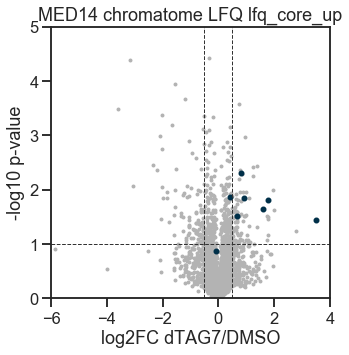

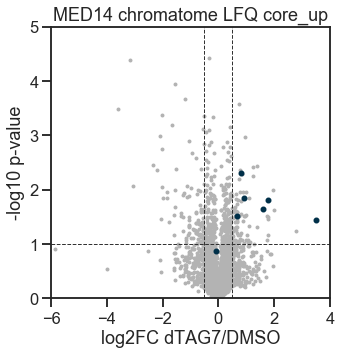

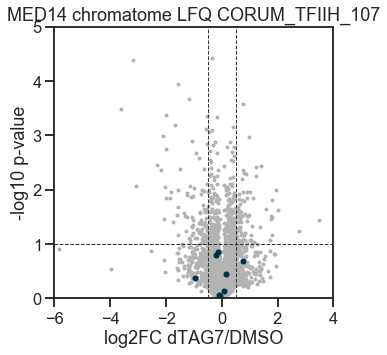

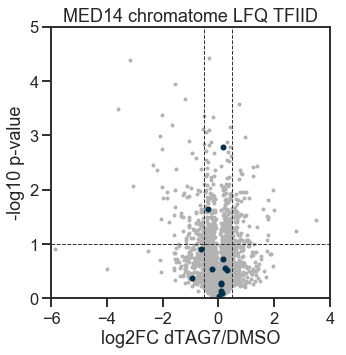

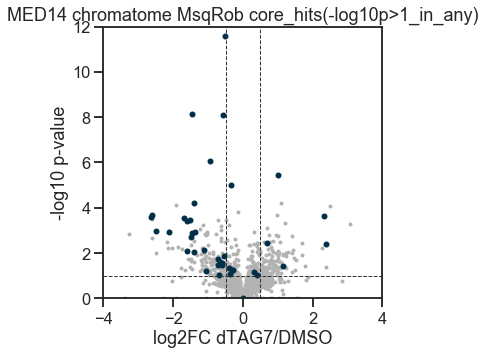

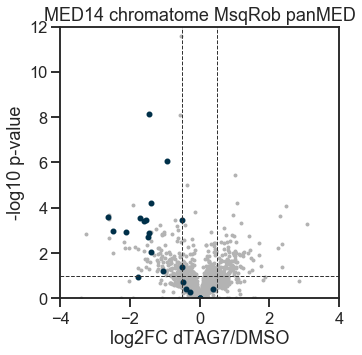

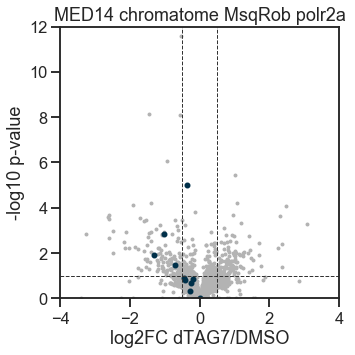

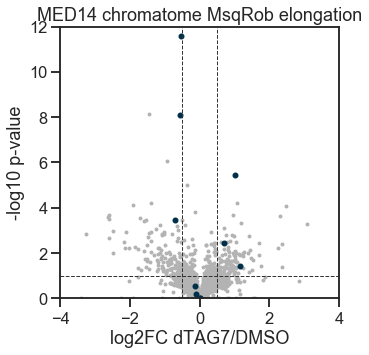

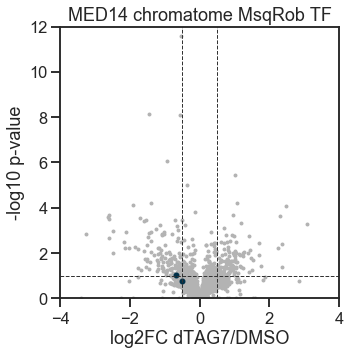

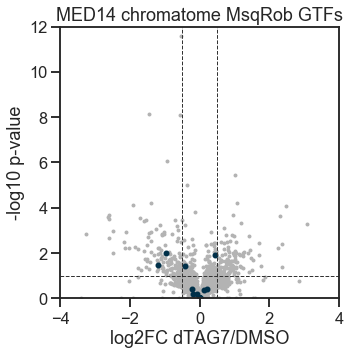

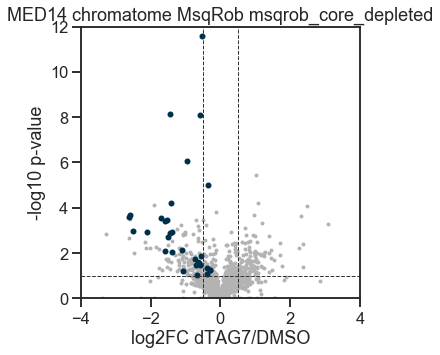

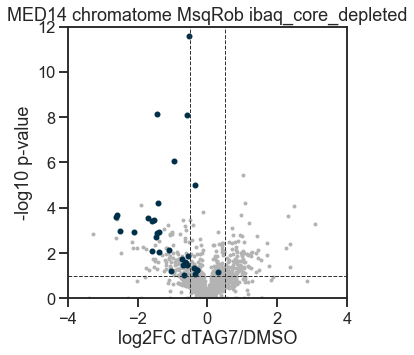

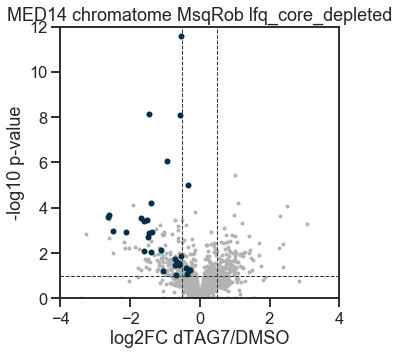

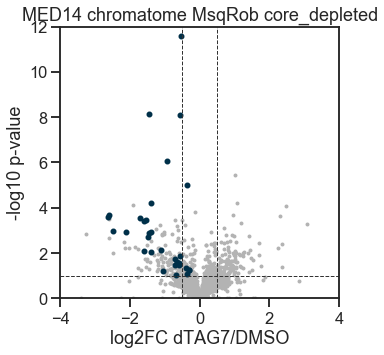

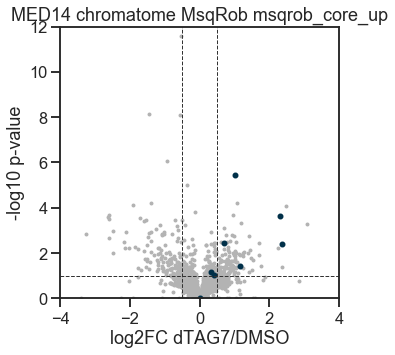

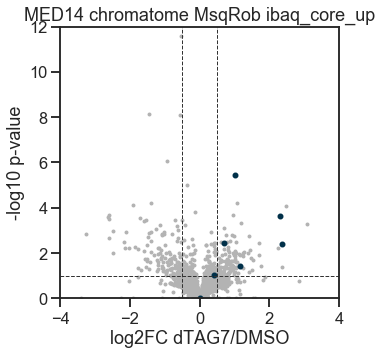

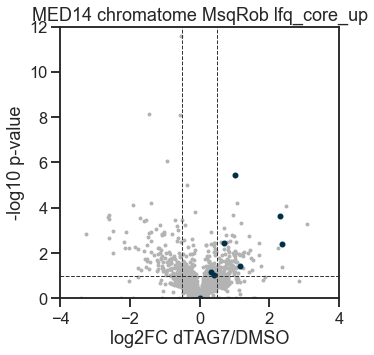

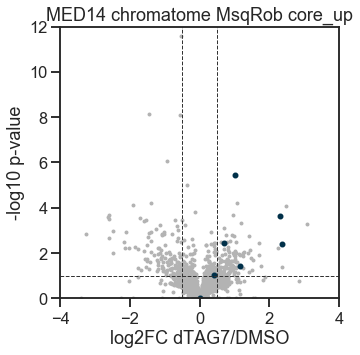

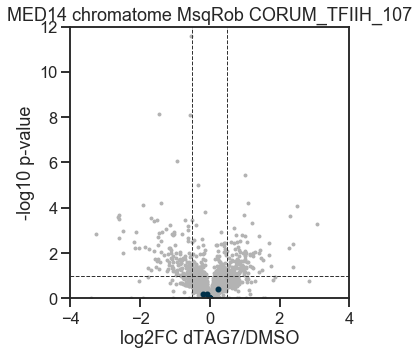

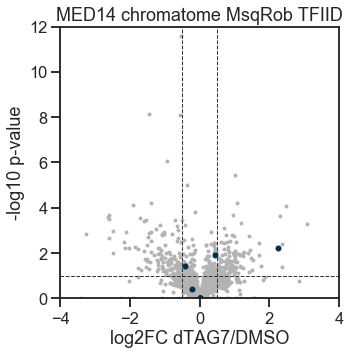

In [5]:
# make the plots individually
counter = 0
for df in [ibaq_df, lfq_df, msqrob_df]:
    counter += 1

    for genelist in hitlist_df.columns:
        plt.close("all")
        sns.set_style('ticks', {'ytick.major.size': 7, 'xtick.major.size': 7})
        sns.set_context('talk')
        f = plt.figure(figsize = (5,5))

        f = plt.axhline(y = 1, c = '.2', linewidth = 1, linestyle = '--')
        f = plt.axvline(x = -0.5, c = '.2', linewidth = 1, linestyle = '--')
        f = plt.axvline(x = 0.5, c = '.2', linewidth = 1, linestyle = '--')
        f = plt.scatter(data=df, x='log2FC', y='-log10p', s = 6, c = '0.7')
        f = plt.scatter(data=df[df.gene.isin(hitlist_df[genelist].dropna().tolist())], x='log2FC', y='-log10p', s = 20, c = '#003049')

        #labels & axes
        plt.xlabel('log2FC dTAG7/DMSO')
        plt.ylabel('-log10 p-value')
        if counter == 1:
            plt.title('MED14 chromatome iBAQ {0}'.format(genelist))
            plt.xlim(-7,5.5)
            plt.ylim(0,5)
            #plt.savefig(plots_dir + '\\iBAQ_volcanoplot_allhits_pan{0}.pdf'.format(genelist), dpi=300)

        elif counter == 2:
            plt.title('MED14 chromatome LFQ {0}'.format(genelist))
            plt.xlim(-6,4)
            plt.ylim(0,5)
            #plt.savefig(plots_dir + '\\LFQ_volcanoplot_allhits_pan{0}.pdf'.format(genelist), dpi=300)

        else:
            plt.title('MED14 chromatome MsqRob {0}'.format(genelist))
            plt.xlim(-4,4)
            plt.ylim(0,12)
            #plt.savefig(plots_dir + '\\MsqRob_volcanoplot_allhits_pan{0}.pdf'.format(genelist), dpi=300)

        plt.show()

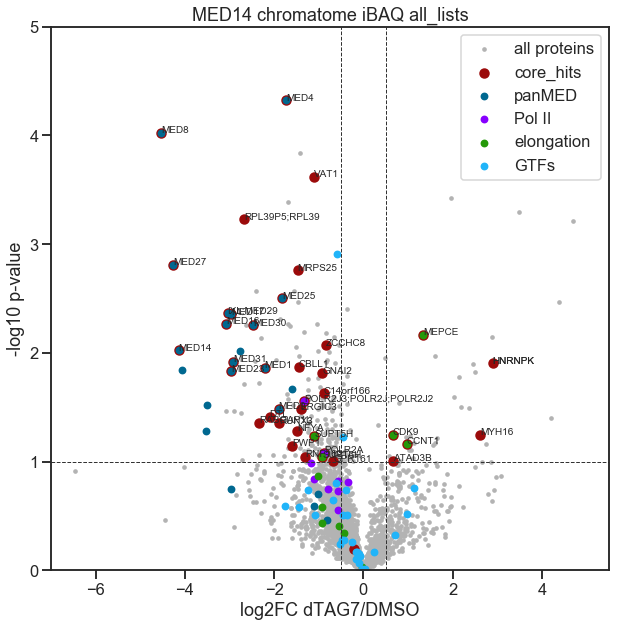

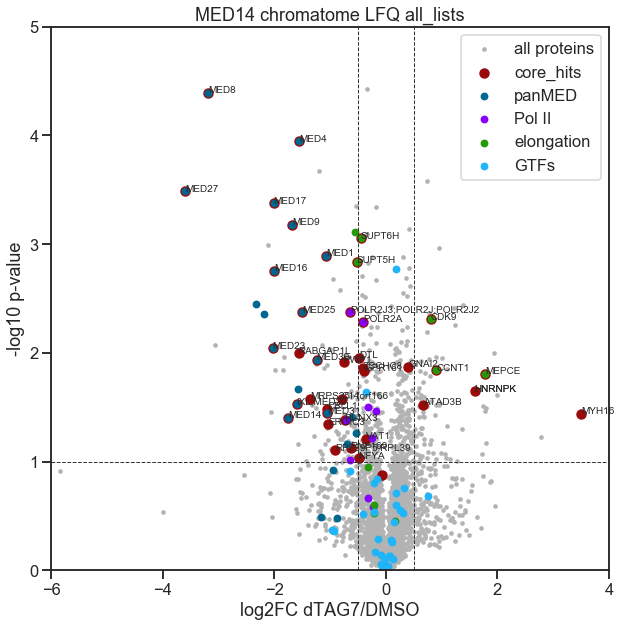

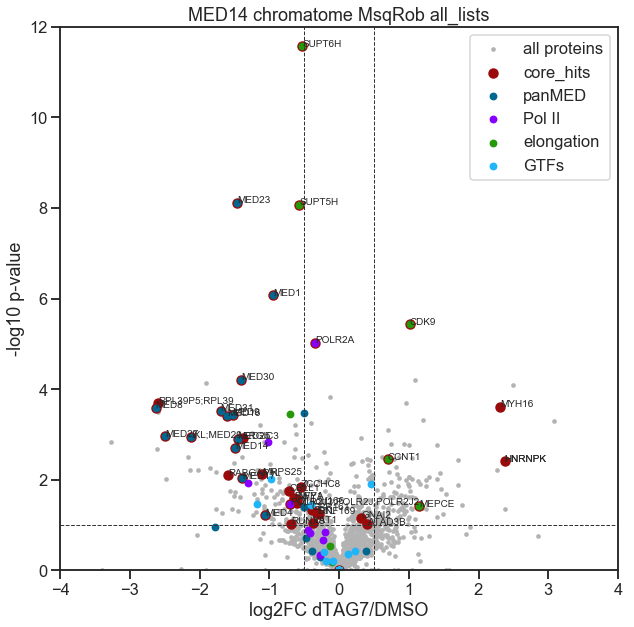

In [6]:
# plot all in one
counter = 0
for df in [ibaq_df, lfq_df, msqrob_df]:
    counter += 1

    plt.close("all")
    sns.set_style('ticks', {'ytick.major.size': 7, 'xtick.major.size': 7})
    sns.set_context('talk')
    plt.figure(figsize = (10,10))

    plt.axhline(y = 1, c = '.2', linewidth = 1, linestyle = '--')
    plt.axvline(x = -0.5, c = '.2', linewidth = 1, linestyle = '--')
    plt.axvline(x = 0.5, c = '.2', linewidth = 1, linestyle = '--')
    plt.scatter(data=df, x='log2FC', y='-log10p', s = 10, c = '0.7', label='all proteins')
    # core hits are -log10p > 1 hits in all three analysis methods (i.e. the venny intersect list)
    plt.scatter(data=df[df.gene.isin(hitlist_df['core_hits(-log10p>1_in_any)'].dropna().tolist())], x='log2FC', y='-log10p', s = 80, c = '#9b0a0a', label='core_hits')
    plt.scatter(data=df[df.gene.isin(hitlist_df['panMED'].dropna().tolist())], x='log2FC', y='-log10p', s = 40, c = '#006890', label='panMED')
    plt.scatter(data=df[df.gene.isin(hitlist_df['polr2a'].dropna().tolist())], x='log2FC', y='-log10p', s = 40, c = '#8700ff', label='Pol II')
    plt.scatter(data=df[df.gene.isin(hitlist_df['elongation'].dropna().tolist())], x='log2FC', y='-log10p', s = 40, c = '#259909', label='elongation')
    plt.scatter(data=df[df.gene.isin(hitlist_df['GTFs'].dropna().tolist())], x='log2FC', y='-log10p', s = 40, c = '#20b4f9', label='GTFs')

    #labels & axes
    plt.xlabel('log2FC dTAG7/DMSO')
    plt.ylabel('-log10 p-value')
    plt.legend()

    ### optional: annotate the data points
    for datapoint in df[df.gene.isin(hitlist_df['core_hits(-log10p>1_in_any)'].dropna().tolist())].gene:
        plt.annotate(datapoint, (df[df.gene == datapoint].sort_values(by='-log10p').tail(n=1)['log2FC'], df[df.gene == datapoint].sort_values(by='-log10p').tail(n=1)['-log10p']), fontsize=10)

    if counter == 1:
        plt.title('MED14 chromatome iBAQ all_lists')
        plt.xlim(-7,5.5)
        plt.ylim(0,5)
        #plt.savefig(plots_dir + '\\iBAQ_volcanoplot_allhits_core_annotated.pdf', dpi=300)

    elif counter == 2:
        plt.title('MED14 chromatome LFQ all_lists')
        plt.xlim(-6,4)
        plt.ylim(0,5)
        #plt.savefig(plots_dir + '\\LFQ_volcanoplot_allhits_core_annotated.pdf', dpi=300)

    else:
        plt.title('MED14 chromatome MsqRob all_lists')
        plt.xlim(-4,4)
        plt.ylim(0,12)
        #plt.savefig(plots_dir + '\\MsqRob_volcanoplot_allhits_core_annotated.pdf', dpi=300)
    
    plt.show()

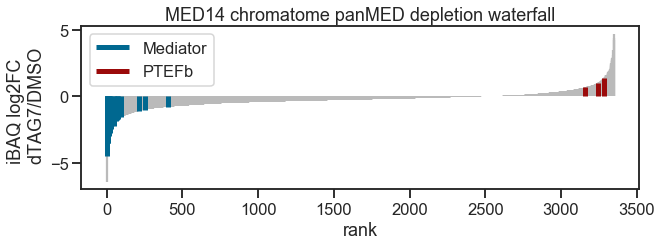

In [7]:
######################
### plot waterfall ###
######################

ibaq_df = ibaq_df.sort_values(by='log2FC')
ibaq_df['rank'] = np.arange(len(ibaq_df.index))

# optional colormap depending on if log2FC < or > 0
my_color=np.where(ibaq_df['log2FC']>=0, '#9b0a0a', '#006890')

plt.close("all")
sns.set_style('ticks', {'ytick.major.size': 7, 'xtick.major.size': 7})
sns.set_context('talk')
f = plt.figure(figsize = (10,3))

plt.vlines(x=ibaq_df['rank'], ymin=0, ymax=ibaq_df['log2FC'], color='#bababa')
plt.vlines(x=ibaq_df[ibaq_df.gene.isin(hitlist_df['panMED'].dropna().tolist())]['rank'], ymin=0, ymax=ibaq_df[ibaq_df.gene.isin(hitlist_df['panMED'].dropna().tolist())]['log2FC'], color='#006890', linewidth=5, label='Mediator')
plt.vlines(x=ibaq_df[ibaq_df.gene.isin(['CDK9', 'CCNT1', 'MEPCE'])]['rank'], ymin=0, ymax=ibaq_df[ibaq_df.gene.isin(['CDK9', 'CCNT1', 'MEPCE'])]['log2FC'], color='#9b0a0a', linewidth=5, label='PTEFb')

plt.xlabel('rank')
plt.ylabel('iBAQ log2FC \n dTAG7/DMSO')
plt.title('MED14 chromatome panMED depletion waterfall')
plt.legend(loc=2)

#for datapoint in ['CDK9', 'CCNT1', 'MEPCE']:
#    plt.annotate(datapoint, (ibaq_df[ibaq_df.gene == datapoint]['rank'] - 150, ibaq_df[ibaq_df.gene == datapoint]['log2FC'] + 0.2), fontsize=8)

#plt.savefig(plots_dir + '\\iBAQ_waterfall__panMED_PTEFb.pdf', dpi=300)

plt.show()


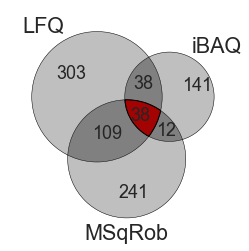

In [8]:
#########################
### make venn diagram ###
#########################

####### IMPORTANT => This is the OLD RESULT when doing the overlap from individual results tables! 
#### For the figure, we used the new, combined table, where some gene names have been harmonized.

# identify core hits
lfq_hits = lfq_df[lfq_df['-log10p'] > 1.0]
ibaq_hits = ibaq_df[ibaq_df['-log10p'] > 1.0]
msqrob_hits = msqrob_df[msqrob_df['-log10p'] > 1.0]

v = venn3((set(lfq_hits.gene), set(ibaq_hits.gene), set(msqrob_hits.gene)), set_labels=('LFQ', 'iBAQ', 'MSqRob'), alpha=1, set_colors=('#bfbfbf', '#bfbfbf', '#bfbfbf'))
c = venn3_circles((set(lfq_hits.gene), set(ibaq_hits.gene), set(msqrob_hits.gene)), linewidth=.5, linestyle='-')

v.get_patch_by_id('111').set_facecolor('#a30303')
v.get_patch_by_id('111').set_edgecolor('#000000')
v.get_patch_by_id('111').set_linewidth(1)
#v.get_patch_by_id('111').set_linestyle('-')

# overlap facecolor grey50
v.get_patch_by_id('011').set_facecolor('#808080')
v.get_patch_by_id('101').set_facecolor('#808080')
v.get_patch_by_id('110').set_facecolor('#808080')

#plt.savefig(plots_dir + "chromatome\\MJ-18-25_AH_chromatome_core_hits_venn3_diagram.pdf", dpi=300)
#plt.savefig(plots_dir + "chromatome\\MJ-18-25_AH_chromatome_core_hits_venn3_diagram.png", dpi=300)
plt.show()

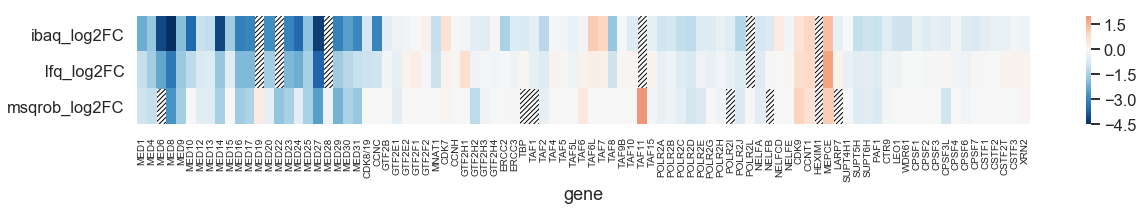

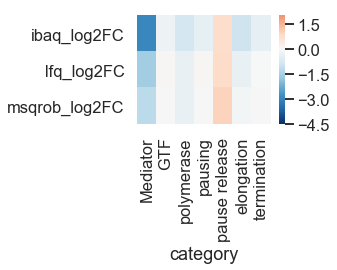

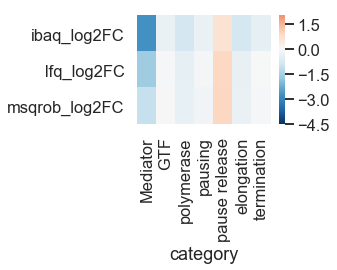

In [38]:
####################
### make heatmap ###
####################
# identify factors to get l2FC for
searchterms = ['GTF2', 'POLR2', 'NELF', 'CPSF', 'CSTF']
searchterms.extend(hitlist_df.panMED.dropna().tolist())
searchterms.extend(hitlist_df.CORUM_TFIIH_107.dropna().tolist())
searchterms.extend(hitlist_df.TFIID.dropna().tolist())
searchterms.extend(hitlist_df.elongation.dropna().tolist())

# start with lfq
lfq_clean = lfq_df[lfq_df.gene.notna()]
lfq_clean = lfq_clean[lfq_clean.gene.str.contains('|'.join(searchterms))].sort_values(by='gene')

plot_df = lfq_clean.set_index('gene').iloc[:,:1]
plot_df.columns = ['lfq_log2FC']

# join ibaq
ibaq_clean = ibaq_df[ibaq_df.gene.notna()]
ibaq_clean = ibaq_clean[ibaq_clean.gene.str.contains('|'.join(searchterms))].sort_values(by='gene').set_index('gene')

plot_df = plot_df.join(ibaq_clean.iloc[:,:1], how='outer')
plot_df.columns = ['lfq_log2FC', 'ibaq_log2FC']

# join msqrob
msqrob_clean = msqrob_df[msqrob_df.gene.notna()]
msqrob_clean = msqrob_clean[msqrob_clean.gene.str.contains('|'.join(searchterms))].sort_values(by='gene').set_index('gene').groupby(level=0).median()

plot_df = plot_df.join(msqrob_clean.iloc[:,:1], how='outer')
plot_df.columns = ['lfq_log2FC', 'ibaq_log2FC', 'msqrob_log2FC']

#plot_df.to_excel(plots_dir + "chromatome\\heatmap_plot_dataframe.xlsx")

#### now plot heatmap
plot_df = pd.read_excel(plots_dir + "chromatome\\manually_curated_input_for_heatmap.xlsx", index_col=0)

plt.close('all')
sns.set_style('white')
sns.set_context('talk')
plt.figure(figsize=(20,2))

g = sns.heatmap(plot_df.iloc[:,:3].T, center=0, vmin=-4.5, vmax=2., cmap='RdBu_r', xticklabels=True)
#g.set_facecolor('xkcd:black')
g.set_xticklabels(g.get_xticklabels(), fontsize = 10)
g.patch.set(hatch='/////', edgecolor='black')

#plt.savefig(plots_dir + "chromatome\\MJ-18-25_AH_heatmap_PIC-components_manual_all3methods_vmax-min_blankHEXIM1.pdf", dpi=300)
#plt.savefig(plots_dir + "chromatome\\MJ-18-25_AH_heatmap_PIC-components_manual_all3methods_vmax-min_blankHEXIM1.png", dpi=300)
plt.show()

# plot median values
plt.close('all')
sns.set_style('white')
sns.set_context('talk')
plt.figure(figsize=(3,2))

g = sns.heatmap(plot_df.groupby(by='category', sort=False).median().T, center=0, vmin=-4.5, vmax=2., cmap='RdBu_r', xticklabels=True)

#plt.savefig(plots_dir + "chromatome\\MJ-18-25_AH_heatmap_PIC-components_manual_all3methods_medians_vmax-min.pdf", dpi=300)
#plt.savefig(plots_dir + "chromatome\\MJ-18-25_AH_heatmap_PIC-components_manual_all3methods_medians_vmax-min.png", dpi=300)
plt.show()

# plot mean values
plt.close('all')
sns.set_style('white')
sns.set_context('talk')
plt.figure(figsize=(3,2))

g = sns.heatmap(plot_df.groupby(by='category', sort=False).mean().T, center=0, vmin=-4.5, vmax=2., cmap='RdBu_r', xticklabels=True)

#plt.savefig(plots_dir + "chromatome\\MJ-18-25_AH_heatmap_PIC-components_manual_all3methods_means_vmax-min.pdf", dpi=300)
#plt.savefig(plots_dir + "chromatome\\MJ-18-25_AH_heatmap_PIC-components_manual_all3methods_means_vmax-min.png", dpi=300)
plt.show()

In [24]:
plot_df[plot_df.category == "Mediator"].sort_values(by="ibaq_log2FC")

,ibaq_log2FC,lfq_log2FC,msqrob_log2FC,category
gene,,,,
MED8,-4.529057,-3.180007,-2.629023e+00,Mediator
MED27,-4.266158,-3.600049,-2.493925e+00,Mediator
MED14,-4.137275,-1.752946,-1.486731e+00,Mediator
MED6,-4.055758,-2.333573,NaN,Mediator
MED10,-3.527401,-1.164316,-2.478216e-19,Mediator
MED24,-3.495512,-2.183397,-4.807549e-01,Mediator
MED16,-3.076529,-2.006289,-1.600461e+00,Mediator
MED29,-3.044940,-1.597445,-2.116307e+00,Mediator
CCNC,-2.969536,-0.879644,-1.039634e-19,Mediator


In [640]:
ibaq_df = pd.read_csv(ibaq_path, sep='\t')
lfq_df = pd.read_csv(lfq_path, sep='\t')
msqrob_df = pd.read_excel(msqrob_path)
# take only protein_IDs, Gene name, log2FC, -log10p, significant columns
ibaq_df = ibaq_df.iloc[:,[3,6,2,1]]
lfq_df = lfq_df.iloc[:,[6,2,1]]
msqrob_df = msqrob_df.iloc[:,[1,3,7]]

master_df = ibaq_df
master_df.columns = ['protein_IDs','gene','iBAQ_log2FC','iBAQ_log10p']
master_df = master_df.set_index('gene')

lfq_df.columns = ['gene','LFQ_log2FC','LFQ_log10p']
lfq_df = lfq_df.set_index('gene')

master_df = master_df.join(lfq_df, sort=False)
master_df = master_df[~master_df.index.isna()]

msqrob_df['pval'] = msqrob_df['pval'].apply(lambda x: -1.0*np.log10(x))
msqrob_df.columns = ['gene','MSqRob_log2FC','MSqRob_log10p']
uniq_msqrob_df = msqrob_df[~msqrob_df['gene'].duplicated()].set_index('gene').dropna()

master_df = master_df.join(uniq_msqrob_df, sort=False) ### only MSqRob columns still contain NaN values here, which will have to be resolved manually

#master_df.to_excel('W:\\lab_winter\\private\\Experiments\\Martin_MJ_private\\2018\\MJ-18-25_AH_MED14_MED1_chromatome\\MJ-18-25_master_table_raw.xlsx')

## now manually add empty values for MSqRob items
# first always try to grep values with gene name: => msqrob_df[msqrob_df.gene == "FAM192A"]


In [641]:
msqrob_df[msqrob_df.gene == "CASP6"]

,gene,MSqRob_log2FC,MSqRob_log10p
74,CASP6,-2.029366,2.218084


In [643]:
msqrob_df = pd.read_excel(msqrob_path)
msqrob_df = msqrob_df.iloc[:,[0,1,3,7]]
msqrob_df.columns = ['protein_IDs','gene','MSqRob_log2FC','MSqRob_log10p']
msqrob_df['MSqRob_log10p'] = msqrob_df['MSqRob_log10p'].apply(lambda x: -1.0*np.log10(x))

In [683]:
msqrob_df[msqrob_df.gene == "IGBP1"]

,protein_IDs,gene,MSqRob_log2FC,MSqRob_log10p
399,P78318,IGBP1,0.511123,1.003913


In [688]:
lfq_df[lfq_df.index.str.contains("SNAPIN", na=False)]

,LFQ_log2FC,LFQ_log10p
gene,,
